In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
         'plantvillage',
          shuffle=True,
          image_size=(IMAGE_SIZE, IMAGE_SIZE),
          batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 0 1 0 0 1 0 1 1 0 0 2 1 1 1 1 0 0 2 0 0 1 0 0 0 0 1 1 1]


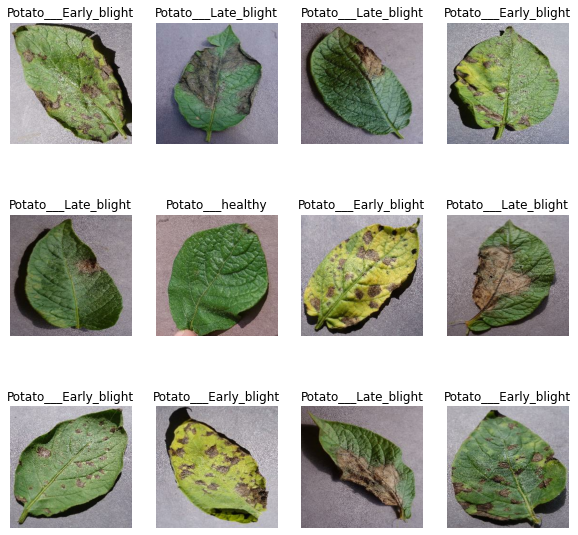

In [13]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [14]:
#We take 80% of dataset as training dataset, 10% as validation dataset and rest 10% as test dataset
train_ds=dataset.take(int(0.8*len(dataset)))
valid_ds=dataset.skip(int(0.8*len(dataset))).take(int(0.1*len(dataset)))
test_ds=dataset.skip(int(0.8*len(dataset))).skip(int(0.1*len(dataset)))

In [16]:
print(len(train_ds))
print(len(valid_ds))
print(len(test_ds))

54
6
8


In [17]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds=valid_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augumentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [29]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3)
model=models.Sequential([
    resize_and_rescale,
    data_augumentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3,activation='softmax')
])
model.build(input_shape=input_shape)

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [31]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [32]:
history= model.fit(train_ds, epochs=50, batch_size=BATCH_SIZE, validation_data=valid_ds)

Epoch 1/50
54/54 [==============================] - 148s 2s/step - loss: 0.8991 - accuracy: 0.5098 - val_loss: 0.7344 - val_accuracy: 0.7396
Epoch 2/50
54/54 [==============================] - 116s 2s/step - loss: 0.6419 - accuracy: 0.7228 - val_loss: 0.4495 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 113s 2s/step - loss: 0.3556 - accuracy: 0.8524 - val_loss: 0.4085 - val_accuracy: 0.8646
Epoch 4/50
54/54 [==============================] - 102s 2s/step - loss: 0.3349 - accuracy: 0.8669 - val_loss: 0.2770 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 97s 2s/step - loss: 0.2464 - accuracy: 0.9086 - val_loss: 0.3130 - val_accuracy: 0.8906
Epoch 6/50
54/54 [==============================] - 111s 2s/step - loss: 0.1873 - accuracy: 0.9300 - val_loss: 0.2403 - val_accuracy: 0.8750
Epoch 7/50
54/54 [==============================] - 109s 2s/step - loss: 0.1687 - accuracy: 0.9323 - val_loss: 0.1635 - val_accuracy: 0.9271
Epoch 8/50
54/

<function matplotlib.pyplot.show(close=None, block=None)>

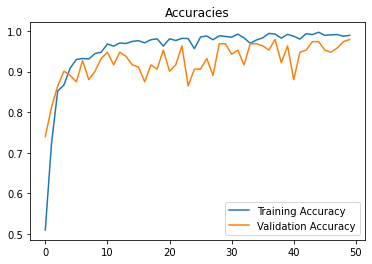

In [35]:
#plt.figure(figsize=())
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracies')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

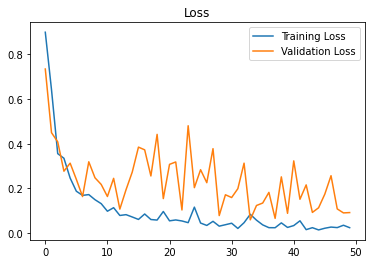

In [38]:
#plt.figure(figsize=())
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show

In [39]:
model.save('potato_classifier.h5')

The first image to be predicted
The label is Potato___Early_blight
The predicted label is: Potato___Early_blight


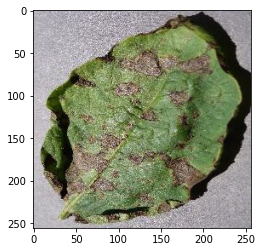

In [56]:
for image_batch, label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label= label_batch[0].numpy()
    print('The first image to be predicted')
    print(f'The label is {class_names[first_label]}')
    plt.imshow(first_image)
    batch_prediction=model.predict(image_batch)
    print(f'The predicted label is: {class_names[np.argmax(batch_prediction[0])]}')

In [57]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


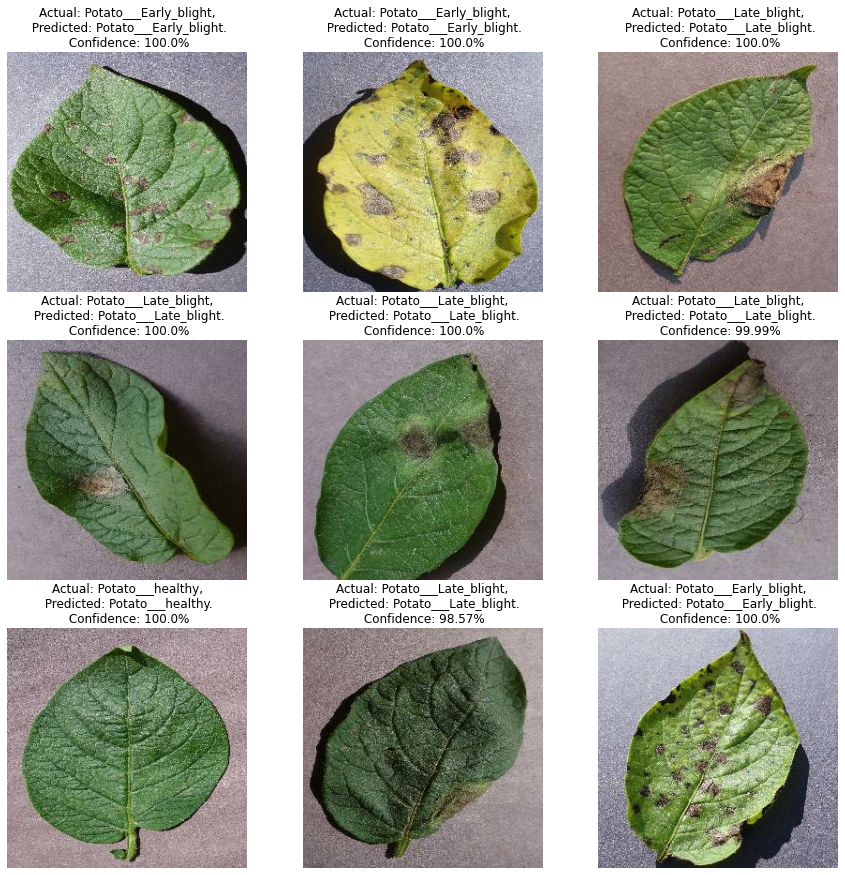

In [58]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")